<a href="https://colab.research.google.com/github/Maylen12/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar ​​un dataframe de al menos 100 filas con datos aleatorios con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contiene las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Informática"
]

# Función para generar nombres y apellidos aleatorios
def generar_nombre_apellido():
    nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Sofía", "Diego", "Valentina"]
    apellidos = ["Gómez", "Rodríguez", "Pérez", "López", "García", "Martínez", "Fernández", "González", "Díaz", "Sánchez"]
    return random.choice(nombres), random.choice(apellidos)

# Generar datos para el DataFrame
data = []
for i in range(100):
    nombre, apellido = generar_nombre_apellido()
    dni = np.random.randint(10000000, 99999999)
    for materia in materias:
        nota_1er_trimestre = round(np.random.uniform(1, 10), 1)
        nota_2do_trimestre = round(np.random.uniform(1, 10), 1)
        nota_3er_trimestre = round(np.random.uniform(1, 10), 1)
        faltas = np.random.randint(0, 15)
        data.append([nombre, apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])


# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre", "Apellido", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])


df

,Nombre,Apellido,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,María,García,73090296,Matemática,3.9,2.9,7.2,4
1,María,García,73090296,Lengua y Literatura,2.8,1.8,6.5,12
2,María,García,73090296,Historia,1.3,5.3,5.6,8
3,María,García,73090296,Geografía,6.4,2.5,8.5,2
4,María,García,73090296,Ciencias Naturales,5.3,3.7,8.3,5
...,...,...,...,...,...,...,...,...
995,Carlos,Sánchez,42484472,Educación Física,1.6,9.3,5.3,0
996,Carlos,Sánchez,42484472,Inglés,1.1,4.2,4.1,2
997,Carlos,Sánchez,42484472,Artes,3.2,6.8,4.4,2
998,Carlos,Sánchez,42484472,Música,6.1,6.3,4.4,1


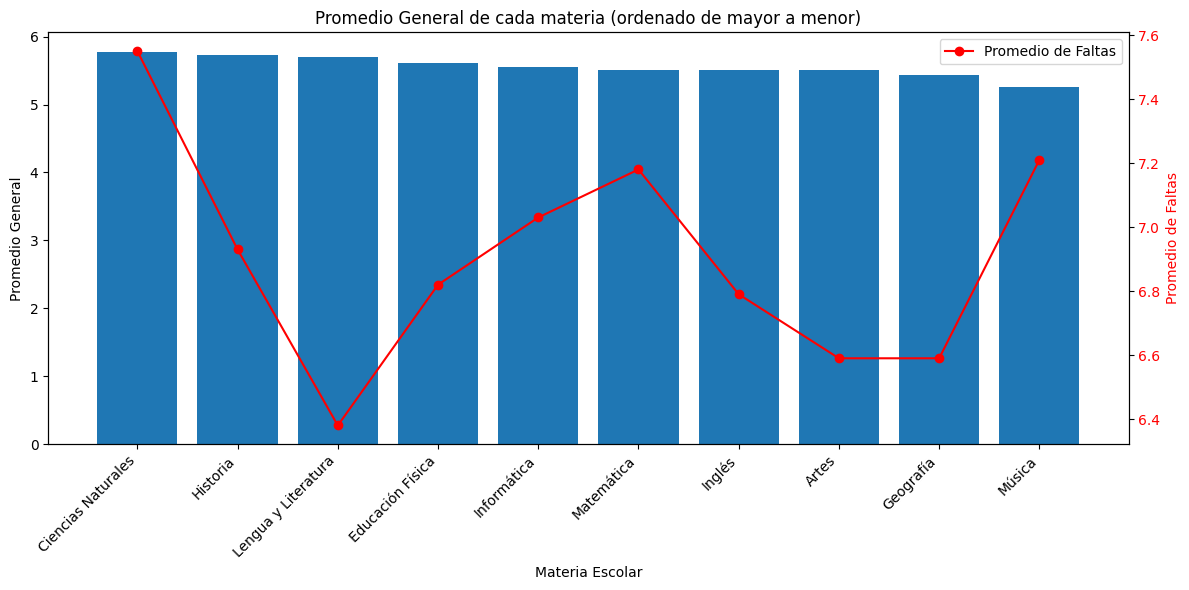

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean', 'Faltas a clases': 'mean'})
promedio_general = (promedio_por_materia['Nota 1er Trimestre'] + promedio_por_materia['Nota 2do Trimestre'] + promedio_por_materia['Nota 3er Trimestre']) / 3


# Ordenar las materias por promedio general de mayor a menor
promedio_general_ordenado = promedio_general.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(promedio_general_ordenado.index, promedio_general_ordenado.values)
plt.xlabel('Materia Escolar')
plt.ylabel('Promedio General')
plt.title('Promedio General de cada materia (ordenado de mayor a menor)')
plt.xticks(rotation=45, ha='right')

# Agregar las faltas como valor contrastable en un segundo eje
ax2 = plt.twinx()
ax2.plot(promedio_general_ordenado.index, promedio_por_materia['Faltas a clases'], color='red', marker='o')
ax2.set_ylabel('Promedio de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyendas
plt.legend(['Promedio de Faltas'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)